# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [96]:
import keras.src.random
from keras import Sequential
from keras.src.losses import mean_squared_error
# Installing the libraries with the specified version
!pip install -r requirements.txt -q


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [97]:
import pandas as pd
df_test = pd.read_csv("data/Test.csv")
df_train = pd.read_csv("data/Train.csv")
df_copy = df_train.copy()
df_train.describe()
# The Training dataset has 20,000 values in it

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


### Observations
- There are 20,000 rows in the dataset.
- There are 41 columns in this dataset the last of which is our target variable.
- V1, V2 have a lower count than the rest of the set likely indicating missing data.
- Add the rows in the dataset have a standard deviation under 5.5

# **Data Overview**

In [98]:
df_train.Target.value_counts()/ df_train.Target.count()


Target
0    0.9445
1    0.0555
Name: count, dtype: float64

### Observations
- 94% of the samples in this dataset have no failure which makes this an unbalanced dataset.

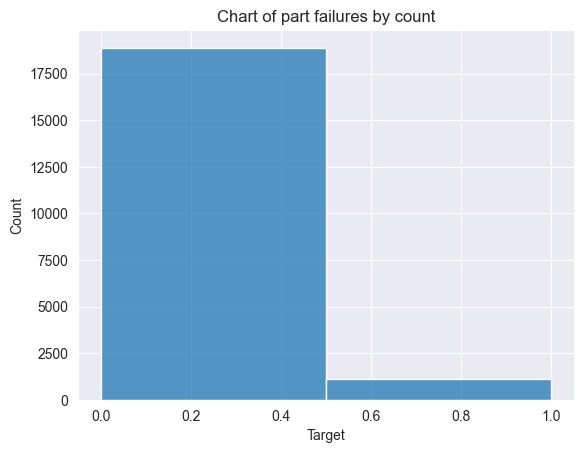

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_train['Target'], binwidth=.5)
plt.title("Chart of part failures by count");
# bar plot is taking a lot of time to generate for some reason.

# **Exploratory Data Analysis**

## Univariate analysis

In [100]:
# Dropping target variable from set. Don't rerun code
df_y = df_train['Target']
df_x = df_train.drop(columns=['Target'])

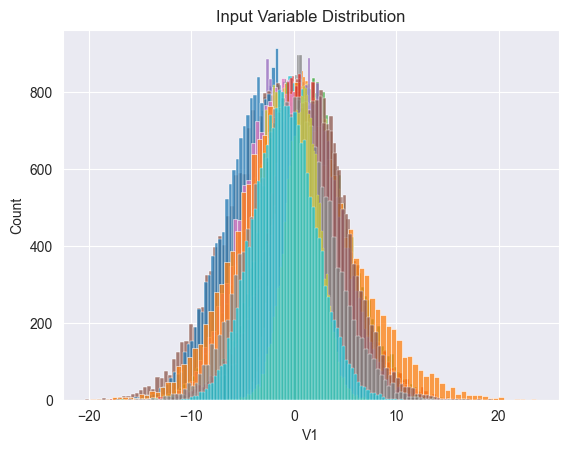

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df_x.columns:
    sns.histplot(df_x[col])
plt.title("Input Variable Distribution");

### Observations
- Looks like all the input variables have a roughly normal distribution.

## Bivariate Analysis

## Target value distribution by Feature

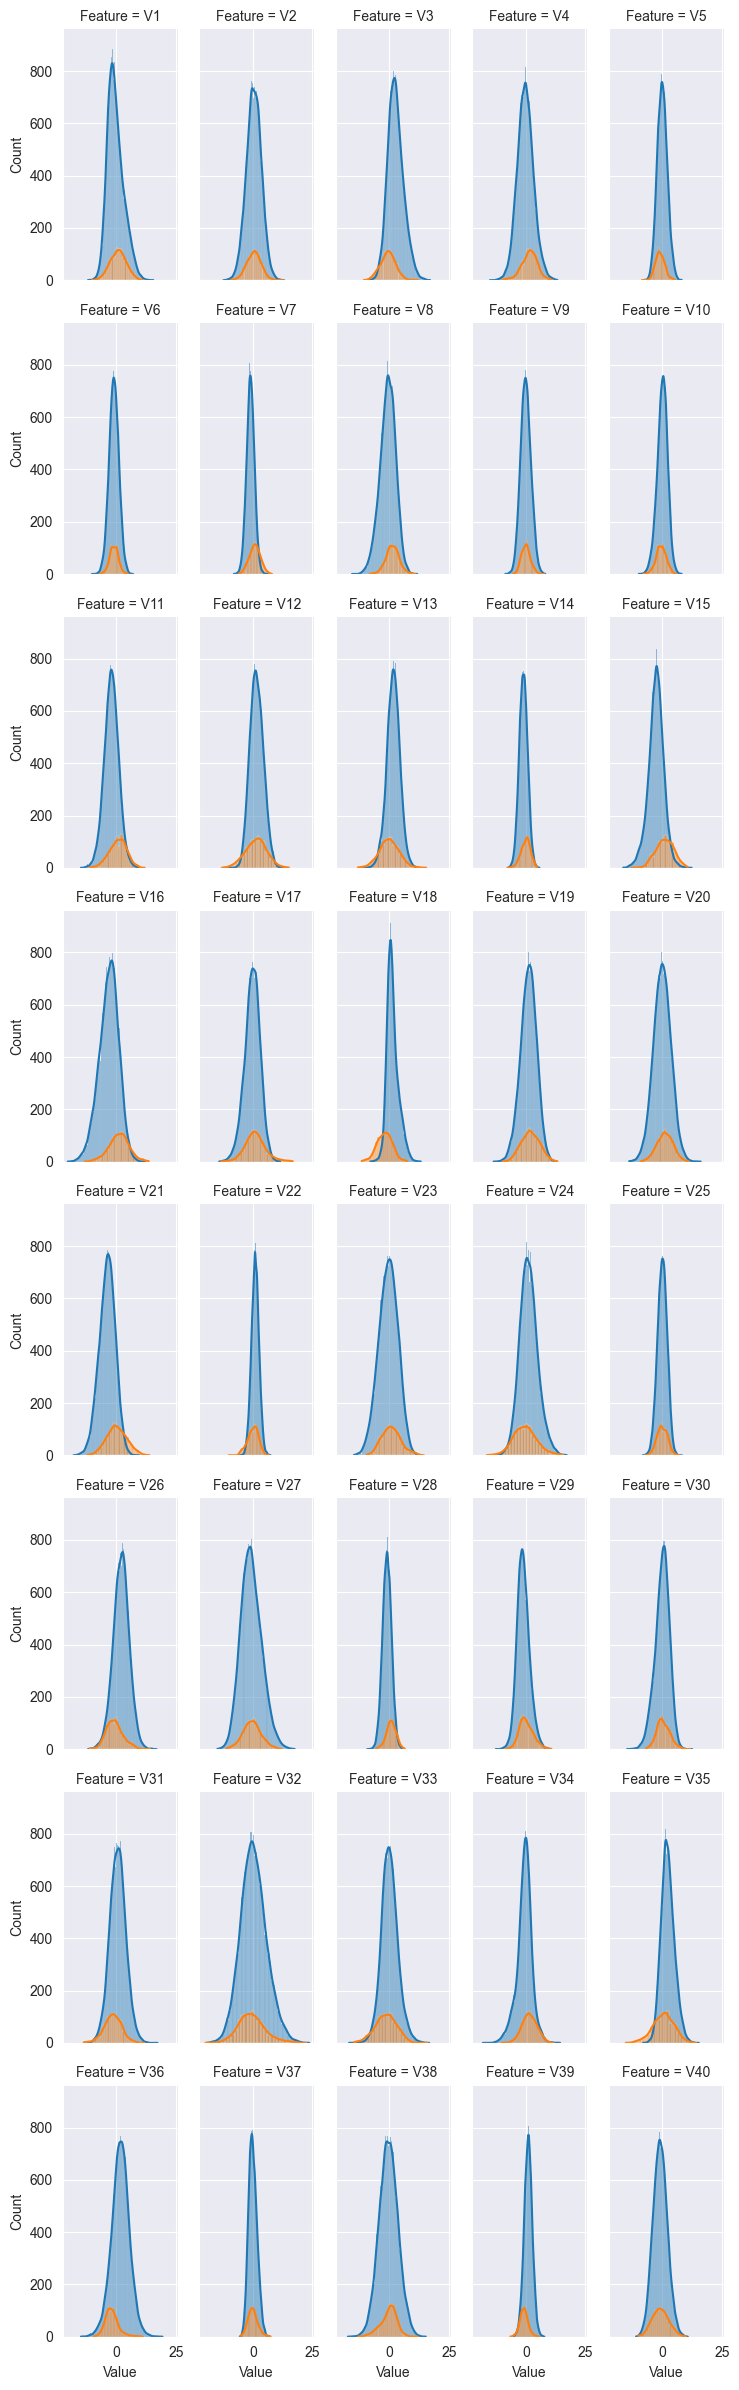

In [102]:
# Here I actually have to separate out the 20 graphs onto different plots.

df_melted = df_train.melt(id_vars="Target", value_vars=df_x.columns, var_name="Feature", value_name="Value")
grid = sns.FacetGrid(df_melted, hue="Target", col="Feature", col_wrap=5, aspect=.5)
grid.map(sns.histplot, "Value", kde=True);

# **Data Preprocessing**

In [103]:
from sklearn.model_selection import train_test_split

df_x.fillna(df_x.mean(), inplace=True)
x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

x_test  = df_test.drop(columns=['Target'])
x_test.fillna(df_test.mean(), inplace=True)
y_test = df_test['Target']
# Data is normalized so we don't need to perform data normalization again.

# **Model Building**

## Model Evaluation Criterion

We need to determine what model evaluation criteria we want to use.
### Unbalanced Dataset
- Because our data set has a vastly larger number of negitive values in it than positive values model accuracy isn't the best metric to use.
### Cost of False Positives
- In our data set the cost of false positives is going to be the cost of the inspection.
### Cost of False Negatives
- The cost of false negatives involve the total downtime of the plant while the part is being replaced.

### Conclusion
- Based on this information it is clearn that the cost of false negatives are much higher for this company than false positives so we will use precision as our model evaluation criterion.

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
RANDOM_SEED = 42
keras.utils.set_random_seed(RANDOM_SEED)


DEFAULT_BATCH_SIZE = 100
DEFAULT_EPOCHS = 20
epochs = 20
model0 = Sequential()
# Create a dense model with 40 input preceptors, one hidden layer and 1 output layer preceptor.
model0.add(Input(shape=(40,)))
model0.add(Dense(units=40, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
model0.summary()
batch_size = DEFAULT_BATCH_SIZE
model0hist = model0.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
hist0 = pd.DataFrame( model0hist.history )

# The first time running this report I didn't have a seed set, so some percentages might have changed slightly.

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.3151 - precision: 0.2391 - val_loss: 0.1109 - val_precision: 0.8740
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.0993 - precision: 0.9224 - val_loss: 0.0815 - val_precision: 0.9430
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.0812 - precision: 0.9515 - val_loss: 0.0707 - val_precision: 0.9826
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.0727 - precision: 0.9565 - val_loss: 0.0651 - val_precision: 0.9831
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.0676 - precision: 0.9699 - val_loss: 0.0618 - val_precision: 0.9836
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.0641 - precision: 0.9774 - val_loss: 0.0596 - val_precision: 0.9838
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.0616 - precision: 0.9817 - val_loss: 0.0582 - val_precision: 0.9840
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.0597 - preci

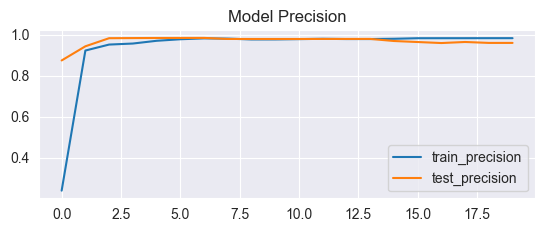

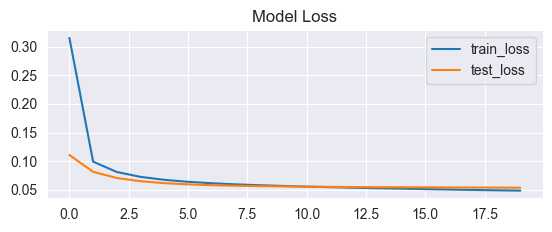

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
0,0.315142,0.239130,0.110893,0.874016,0,100,Model0:Initial Model,2
1,0.099280,0.922399,0.081498,0.943038,1,100,Model0:Initial Model,2
2,0.081173,0.951515,0.070700,0.982558,2,100,Model0:Initial Model,2
3,0.072680,0.956522,0.065092,0.983146,3,100,Model0:Initial Model,2
4,0.067564,0.969914,0.061752,0.983607,4,100,Model0:Initial Model,2


In [105]:
def graph_model(hist = hist0):

    plt.subplot(2,1,1)
    plt.title("Model Precision")
    plt.plot(hist['precision'])
    plt.plot(hist['val_precision'])
    plt.legend(("train_precision", "test_precision"))
    plt.show()

    plt.subplot(2,1,2)

    plt.title('Model Loss')
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(("train_loss", "test_loss"))
    plt.show()

graph_model(hist0)
hist0['epoch'] = model0hist.epoch
hist0['batch_size'] = batch_size
hist0['model_name'] = "Model0:Initial Model"
hist0['num_layers'] = 2
hist0.head()


In [106]:
best_models = pd.DataFrame(columns=hist0.columns)
loss_optimization= hist0.sort_values(by='val_loss', ascending=True)
best_models.loc[0] = hist0.loc[loss_optimization.index[0]]
best_models.loc[1] = hist0.loc[hist0.index[1]]
best_models.head()

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
0,0.048669,0.982736,0.053757,0.959596,19,100,Model0:Initial Model,2
1,0.09928,0.922399,0.081498,0.943038,1,100,Model0:Initial Model,2


#### Observations
- The point where the train and test model are the closest is epoch 1, so we are adding that model to our list of best models.
- If you sort the test data, by the loss function epoch 9 is the best, so I am adding that model to the list for consideration as well.
- The best model from this round of testing has a precision of 95%

# **Model Performance Improvement**

## Model 1: Tune Learning Rate
Tuning learning rate:
- In this trial I tried several different learning rates and evaluated each by the val_precision for the last epoch

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 23.6237 - precision: 0.5291 - val_loss: 39.6433 - val_precision: 0.3594
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 25.9033 - precision: 0.6370 - val_loss: 21.7944 - val_precision: 0.8927
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 18.0705 - precision: 0.6626 - val_loss: 68.2040 - val_precision: 0.4513
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 30.5918 - precision: 0.6392 - val_loss: 25.3629 - val_precision: 0.7435
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 14.3208 - precision: 0.7253 - val_loss: 9.8279 - val_precision: 0.7300
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 4.0267 - precision: 0.8389 - val_loss: 10.1719 - val_precision: 0.7340
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 9.6315 - precision: 0.7093 - val_loss: 24.1298 - val_precision: 0.8315
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 10.

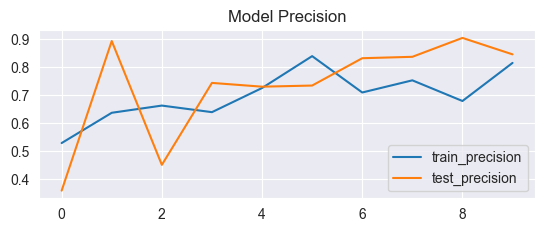

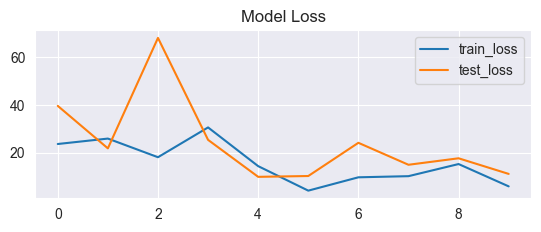

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
4,14.320761,0.725275,9.827948,0.730000,4,100,Model1: learning_rate:.9,2
5,4.026729,0.838926,10.171947,0.734043,5,100,Model1: learning_rate:.9,2
9,5.821884,0.814759,11.056763,0.845238,9,100,Model1: learning_rate:.9,2
7,10.107287,0.752640,14.898969,0.836478,7,100,Model1: learning_rate:.9,2
8,15.201674,0.678947,17.621832,0.903846,8,100,Model1: learning_rate:.9,2


In [107]:
from keras.src.optimizers import Adam

current_index = 1

model1 = Sequential()
# Create a dense model with 40 input preceptors, one hidden layer and 1 output layer preceptor.
model1.add(Input(shape=(40,)))
model1.add(Dense(units=40, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=Adam(learning_rate=.9), loss='binary_crossentropy', metrics=['precision'])
model1.summary()
batch_size = DEFAULT_BATCH_SIZE
model1hist = model1.fit(x_train, y_train, epochs=10, batch_size=DEFAULT_BATCH_SIZE, validation_data=(x_val, y_val))
hist1 = pd.DataFrame( model1hist.history )
graph_model(hist1)
hist1['epoch'] = model1hist.epoch
hist1['batch_size'] = batch_size
hist1['model_name'] = "Model1: learning_rate:.9"
hist1['num_layers'] = 2
loss_optimization = hist1.sort_values(by='val_loss', ascending=True)

best_models.loc[current_index] = hist1.loc[loss_optimization.index[0]]
loss_optimization.head(5)

#### Observations
- Both the loss and precision value went down in this trial, and the model swung wildly from epoch.
- I am saving the model to the list of best models for the sake of documentation.

## Model 2: Add more layers

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,321 (12.97 KB)

 Trainable params: 3,321 (12.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 0.2342 - precision: 0.3055 - val_loss: 0.0929 - val_precision: 0.9073
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.0807 - precision: 0.9285 - val_loss: 0.0668 - val_precision: 0.9602
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.0651 - precision: 0.9530 - val_loss: 0.0588 - val_precision: 0.9731
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0582 - precision: 0.9676 - val_loss: 0.0548 - val_precision: 0.9794
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.0538 - precision: 0.9706 - val_loss: 0.0524 - val_precision: 0.9848
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0504 - precision: 0.9750 - val_loss: 0.0505 - val_precision: 0.9899
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.0476 - precision: 0.9779 - val_loss: 0.0493 - val_precision: 0.9850
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0454 - preci

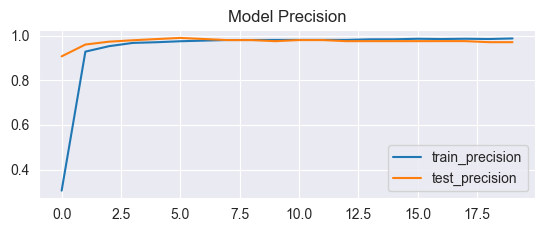

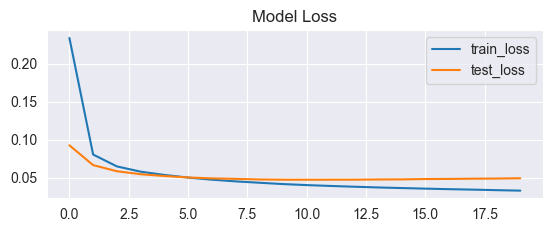

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
10,0.040496,0.981013,0.047554,0.980198,10,100,Model2: Adam 3 layers,3
11,0.039364,0.981013,0.047600,0.980198,11,100,Model2: Adam 3 layers,3
9,0.041846,0.980818,0.047612,0.975369,9,100,Model2: Adam 3 layers,3
12,0.038356,0.981037,0.047639,0.975369,12,100,Model2: Adam 3 layers,3
8,0.043592,0.980595,0.047910,0.980198,8,100,Model2: Adam 3 layers,3


In [108]:
# Create a dense model with 40 input preceptors, one hidden layer and 1 output layer preceptor.
current_index = 2
model2 = Sequential()
model2.add(Input(shape=(40,)))
model2.add(Dense(units=40, activation='relu'))
model2.add(Dense(units=40, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
model2.summary()
model2hist = model2.fit(x_train, y_train, epochs=epochs, batch_size=DEFAULT_BATCH_SIZE, validation_data=(x_val, y_val))
hist2 = pd.DataFrame( model2hist.history )

graph_model(hist2)
hist2['epoch'] = model2hist.epoch
hist2['batch_size'] = batch_size
hist2['model_name'] = "Model2: Adam 3 layers"
hist2['num_layers'] = 3
hist2.head(10)
loss_optimization = hist2.sort_values(by='val_loss', ascending=True)
best_models.loc[current_index] = hist2.loc[loss_optimization.index[0]]
best_models.sort_values(by='val_loss', ascending=True, inplace=True)
loss_optimization.head(5)

### Observations
### Observations
- When the Adam optimization function is used with two hidden layers, we get precision of about 96.3%
- This model takes 15 epochs to stabilize.

## Model 3: Add 2 Extra Layers

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2550 - precision: 0.1706 - val_loss: 0.1084 - val_precision: 0.9902
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.0856 - precision: 0.9508 - val_loss: 0.0677 - val_precision: 0.9721
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0628 - precision: 0.9656 - val_loss: 0.0554 - val_precision: 0.9789
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0533 - precision: 0.9750 - val_loss: 0.0508 - val_precision: 0.9949
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.0480 - precision: 0.9779 - val_loss: 0.0484 - val_precision: 0.9949
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.0445 - precision: 0.9782 - val_loss: 0.0471 - val_precision: 0.9949
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0419 - precision: 0.9772 - val_loss: 0.0467 - val_precision: 0.9900
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.0400 - precisi

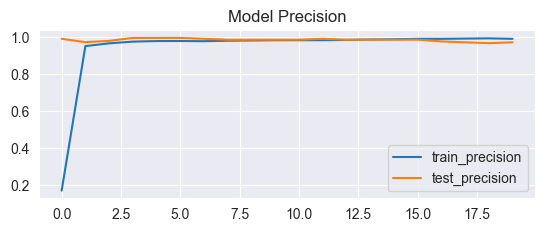

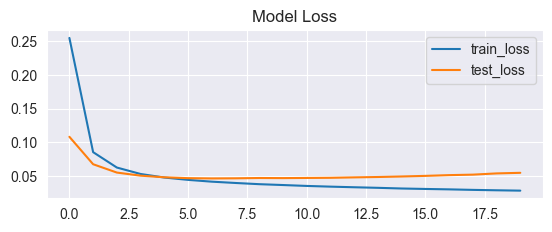

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
6,0.041896,0.977186,0.046680,0.990050,6,100,Model3: Adam 4 layers,4
7,0.039952,0.979772,0.046864,0.985148,7,100,Model3: Adam 4 layers,4
5,0.044546,0.978233,0.047087,0.994950,5,100,Model3: Adam 4 layers,4
9,0.036899,0.982478,0.047172,0.985366,9,100,Model3: Adam 4 layers,4
8,0.038168,0.981108,0.047314,0.985222,8,100,Model3: Adam 4 layers,4


In [109]:
# Create a dense model with 40 input preceptors, one hidden layer and 1 output layer preceptor.
current_index = 3
model3 = Sequential()
model3.add(Input(shape=(40,)))
model3.add(Dense(units=40, activation='relu'))
model3.add(Dense(units=40, activation='relu'))
model3.add(Dense(units=40, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
model3.summary()
model3hist = model3.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
hist3 = pd.DataFrame(model3hist.history)

graph_model(hist3)
hist3['epoch'] = model3hist.epoch
hist3['batch_size'] = batch_size
hist3['model_name'] = "Model3: Adam 4 layers"
hist3['num_layers'] = 4
loss_optimization = hist3.sort_values(by='val_loss', ascending=True)
best_models.loc[current_index] = hist3.loc[loss_optimization.index[0]]
loss_optimization.head(5)


### Observations
- When the Adam optimization function is used with three hidden layers, we get precision of about 97%
- It takes 10 epochs for this model to stabilize

## Model 4: Decrease Batch Size

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 0.1123 - precision: 0.8100 - val_loss: 0.0605 - val_precision: 0.9661
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.0602 - precision: 0.9634 - val_loss: 0.0520 - val_precision: 0.9843
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.0523 - precision: 0.9711 - val_loss: 0.0506 - val_precision: 0.9703
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.0472 - precision: 0.9755 - val_loss: 0.0510 - val_precision: 0.9703
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.0437 - precision: 0.9770 - val_loss: 0.0521 - val_precision: 0.9659
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.0411 - precision: 0.9796 - val_loss: 0.0527 - val_precision: 0.9663
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.0391 - precision: 0.9810 - val_loss: 0.0537 - val_precision: 0.9710
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.0378 - preci

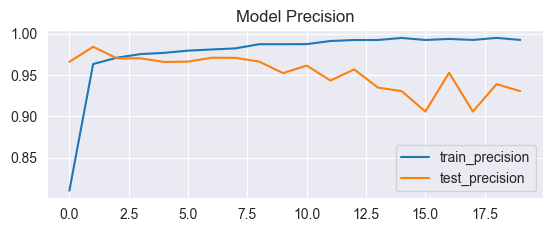

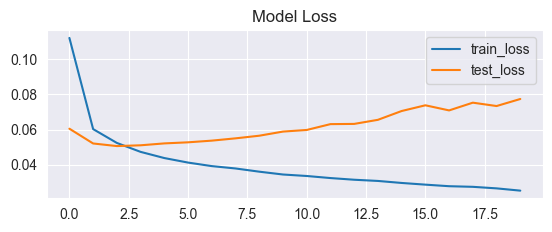

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
2,0.052342,0.971053,0.050550,0.970297,2,50,Model4: Decrease Batch Size,4
3,0.047241,0.975452,0.050994,0.970297,3,50,Model4: Decrease Batch Size,4
1,0.060243,0.963365,0.052035,0.984293,1,50,Model4: Decrease Batch Size,4
4,0.043713,0.976953,0.052076,0.965854,4,50,Model4: Decrease Batch Size,4
5,0.041128,0.979644,0.052696,0.966346,5,50,Model4: Decrease Batch Size,4


In [110]:
current_index = 4
batch_size = int( DEFAULT_BATCH_SIZE / 2)
# Create a dense model with 40 input preceptors, one hidden layer and 1 output layer preceptor.

model4 = Sequential()
model4.add(Input(shape=(40,)))
model4.add(Dense(units=40, activation='relu'))
model4.add(Dense(units=40, activation='relu'))
model4.add(Dense(units=40, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
model4.summary()
model4hist = model4.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
hist4 = pd.DataFrame(model4hist.history)

graph_model(hist4)
hist4['epoch'] = model4hist.epoch
hist4['batch_size'] = batch_size
hist4['model_name'] = "Model4: Decrease Batch Size"
hist4['num_layers'] = 4
hist4.head(10)
loss_optimization = hist4.sort_values(by='val_loss', ascending=True)

best_models.loc[current_index] = hist4.loc[loss_optimization.index[0]]
best_models.sort_values(by='val_loss', ascending=True, inplace=True)
loss_optimization.head()

#### Observations
- Reducing the batch size did not help model performance

## Model 5: SGD 50 epochs

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.1928 - precision: 0.5507 - val_loss: 0.1556 - val_precision: 1.0000
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.1365 - precision: 0.9538 - val_loss: 0.1231 - val_precision: 0.9432
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.1133 - precision: 0.9589 - val_loss: 0.1040 - val_precision: 0.9431
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.0998 - precision: 0.9552 - val_loss: 0.0920 - val_precision: 0.9574
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.0910 - precision: 0.9542 - val_loss: 0.0839 - val_precision: 0.9490
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.0845 - precision: 0.9581 - val_loss: 0.0780 - val_precision: 0.9524
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0795 - precision: 0.9599 - val_loss: 0.0735 - val_precision: 0.9591
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.0756 - preci

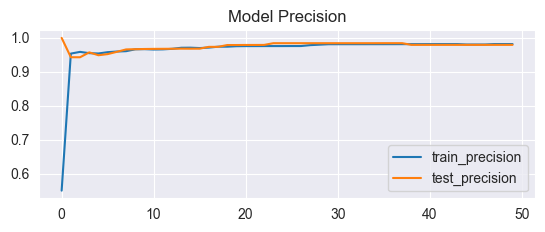

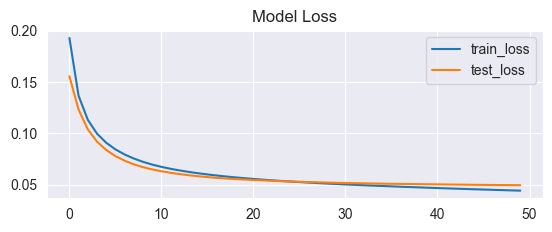

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
0,0.192802,0.550725,0.155618,1.000000,0,100,model5: SGD Additional Epochs,4
37,0.047886,0.981651,0.050838,0.984536,37,100,model5: SGD Additional Epochs,4
36,0.048226,0.981579,0.050937,0.984536,36,100,model5: SGD Additional Epochs,4
35,0.048564,0.981555,0.051058,0.984536,35,100,model5: SGD Additional Epochs,4
23,0.053835,0.976000,0.053627,0.984456,23,100,model5: SGD Additional Epochs,4


In [111]:
# Create a dense model with 40 input preceptors, one hidden layer and 1 output layer preceptor.
model5 = Sequential()
model5.add(Input(shape=(40,)))
model5.add(Dense(units=40, activation='relu'))
model5.add(Dense(units=40, activation='relu'))
model5.add(Dense(units=40, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['precision'])
model5.summary()
batch_size = DEFAULT_BATCH_SIZE
epochs = 50
model5hist = model5.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
hist5 = pd.DataFrame(model5hist.history)

graph_model(hist5)
hist5['epoch'] = model5hist.epoch
hist5['batch_size'] = batch_size
hist5['model_name'] = "model5: SGD Additional Epochs"
hist5['num_layers'] = 4
hist5.head(10)
loss_optimization = hist5.sort_values(by='val_loss', ascending=True)
hist5.sort_values(by="val_precision", ascending=False).head(5)

### Observations
- Adding additional Epochs the Gradiant Decent algorithm does improve performance.
- The SGD algorithm was able to achive a precision of 97.8%



In [112]:
current_index = 10
best_models.loc[current_index] = hist5.loc[19]
best_models.loc[current_index + 1] = hist5.loc[29]
best_models.loc[current_index + 2] = hist5.loc[39]
best_models.loc[current_index + 3] = hist5.loc[49]
best_models.sort_values(by='val_precision', ascending=False, inplace=True)
best_models.head(5)

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
3,0.041896,0.977186,0.04668,0.99005,6,100,Model3: Adam 4 layers,4
11,0.050839,0.981432,0.052018,0.984456,29,100,model5: SGD Additional Epochs,4
2,0.040496,0.981013,0.047554,0.980198,10,100,Model2: Adam 3 layers,3
12,0.047231,0.981675,0.050612,0.979592,39,100,model5: SGD Additional Epochs,4
13,0.044397,0.981912,0.049704,0.979592,49,100,model5: SGD Additional Epochs,4


## Model 6: Adam Additional Epochs

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 0.1700 - precision: 0.4600 - val_loss: 0.0811 - val_precision: 0.9461
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0746 - precision: 0.9367 - val_loss: 0.0579 - val_precision: 0.9686
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0593 - precision: 0.9666 - val_loss: 0.0505 - val_precision: 0.9701
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0521 - precision: 0.9802 - val_loss: 0.0482 - val_precision: 0.9851
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.0477 - precision: 0.9817 - val_loss: 0.0470 - val_precision: 0.9901
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.0443 - precision: 0.9806 - val_loss: 0.0467 - val_precision: 0.9950
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0420 - precision: 0.9795 - val_loss: 0.0463 - val_precision: 0.9951
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.0401 - preci

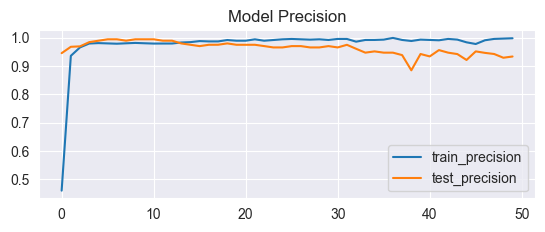

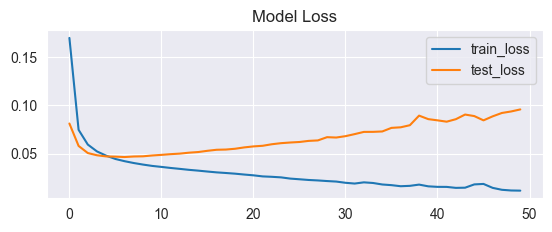

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
6,0.042012,0.979487,0.046343,0.995098,6,100,model6: Adam Additional Epochs,4
5,0.044326,0.980570,0.046739,0.995049,5,100,model6: Adam Additional Epochs,4
7,0.040107,0.980940,0.046896,0.990244,7,100,model6: Adam Additional Epochs,4
4,0.047728,0.981651,0.046971,0.990099,4,100,model6: Adam Additional Epochs,4
8,0.038506,0.982301,0.047091,0.995098,8,100,model6: Adam Additional Epochs,4


In [113]:
# Create a dense model with 40 input preceptors, one hidden layer and 1 output layer preceptor.
model6 = Sequential()
model6.add(Input(shape=(40,)))
model6.add(Dense(units=40, activation='relu'))
model6.add(Dense(units=40, activation='relu'))
model6.add(Dense(units=40, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])
model6.summary()
batch_size = DEFAULT_BATCH_SIZE
epochs = 50
model6hist = model6.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
hist6 = pd.DataFrame(model6hist.history)

graph_model(hist6)
hist6['epoch'] = model6hist.epoch
hist6['batch_size'] = batch_size
hist6['model_name'] = "model6: Adam Additional Epochs"
hist6['num_layers'] = 4
loss_optimization = hist6.sort_values(by='val_loss', ascending=True)
loss_optimization.head(5)

### Observations
- Adding more epochs to the adam optimization function creates more noise rather than a more precise model.

In [114]:
current_index = best_models.size
best_models.loc[current_index] = hist6.loc[loss_optimization.index[0]]

# **Model Performance Comparison and Final Model Selection**

To select the final model, we will compare the performances of all the models for the training and validation sets.

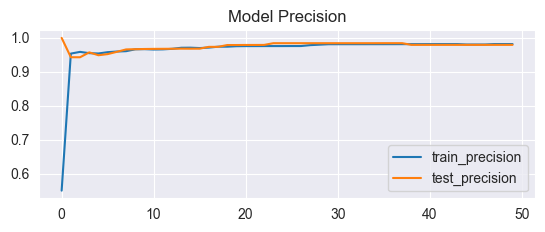

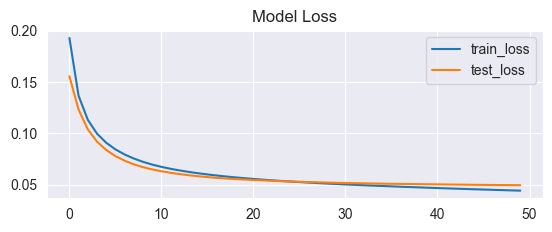

,loss,precision,val_loss,val_precision,epoch,batch_size,model_name,num_layers
72,0.042012,0.979487,0.046343,0.995098,6,100,model6: Adam Additional Epochs,4
3,0.041896,0.977186,0.04668,0.99005,6,100,Model3: Adam 4 layers,4
11,0.050839,0.981432,0.052018,0.984456,29,100,model5: SGD Additional Epochs,4
2,0.040496,0.981013,0.047554,0.980198,10,100,Model2: Adam 3 layers,3
12,0.047231,0.981675,0.050612,0.979592,39,100,model5: SGD Additional Epochs,4


In [115]:
graph_model(hist5)
best_models.sort_values(by="val_precision", ascending=False, inplace=True)
best_models.head(5)

Now, let's check the performance of the final model on the test set.

In [117]:
from sklearn.metrics import mean_squared_error
mse5 = mean_squared_error(y_test, model5.predict(x_test))
print(f"Model5 MSE {(mse5 * 100)}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
Model5 MSE 1.0605710558593273%


~~#### Observations
- Adam preformed better than SDG when fewer epochs were allowed, but when more training was done SDG came out ahead.
- Adding more layers increases model performance.
- Attempting to manually tune the model learning rate made the performance worse.
- The performance of these two models was similar, but the SDG model looks more stable based on the graph.
- The final model has a MSE of about 1%~~

`# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

I would recommend the client deploy model5 to production which was built with the following parameters.
- Batch Size: 100
- 3 Hidden Layers
- SGD optimization function
- Fifty epochs of training